In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# soccer-ball
import urllib.request
import io
import zipfile

# Functions

### Optimally Connected

In [2]:
def is_optimally_connected(graph):
    kappa = nx.minimum_node_cut(graph) # node cut number
    gamma = nx.minimum_edge_cut(graph) # edge cut nomber
    degrees = [val for (node, val) in graph.degree()]
    delta = min(degrees)
    return kappa == gamma and gamma == delta

### Automorphism

In [3]:
def mapped_edge_exists(graph, permute, edge):
    u = edge[0]
    v = edge[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)
    
def get_automorphisms(graph):
    # getting all possible permutations
    permutations = list(map(list, itertools.permutations(graph.nodes())))
    
    # if we don't accept automorphism to itself it should be uncommented
    # permutations.remove(list(graph.nodes()))
    
    automorphisms = []
    edges = list(graph.edges())
    for permute in permutations:
        if all([mapped_edge_exists(graph, permute, edge) for edge in edges]):
            automorphisms.append(permute)
    
    return automorphisms

### Node Simmilarity

In [4]:
def is_node_similar(graph, automorphisms):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    for node_set in node_sets:
        if not any([automorphism.index(node_set[0]) == node_set[1] for automorphism in automorphisms]):
            return False
    
    return True

### Node Similarity (Manual Permutation)

In [5]:
# def permute_has_node_similarity_condition(graph, node_set, permute):
#     u = node_set[0]
#     v = node_set[1]
#     mapped_u = permute.index(u)
#     mapped_v = permute.index(v)
#     return graph.has_edge(mapped_u, mapped_v)

# def update_node_sets(graph, node_sets, curr):
#     for node_set in node_sets:
#             if permute_has_node_similarity_condition(graph, node_set, curr):
#                 node_sets.remove(node_set)

# def permute_node_similarity_version(graph, node_sets, curr, remain):
#     if len(remain) == 0: # having complete permutation
#         # print(f'node_sets len: {len(node_sets)}')
#         update_node_sets(graph, node_sets, curr)
    
#     remain_copy = remain.copy()
#     for i in remain:
#         if len(node_sets) == 0:
#             return
        
#         curr.append(i)
#         remain_copy.remove(i)
#         permute(graph, node_sets, curr, remain_copy)
#         remain_copy.append(i)
#         curr.remove(i)
        

# def is_node_similar_manual_permutation(graph):
#     node_sets = list(itertools.permutations(graph.nodes(), 2))
#     permute_node_similarity_version(graph, node_sets, [], list(graph.nodes()))
#     return len(node_sets) == 0

### symmetry

In [6]:
def is_symmetry(graph, automorphisms):
    edges = list(graph.edges())
    edge_sets = list(itertools.permutations(edges, 2))
    
    for (edge1, edge2) in edge_sets:
        (u,v) = edge1
        (x, y) = edge2
        if not any([automorphism.index(u) == x and automorphism.index(v) == y for automorphism in automorphisms]):
            return False
        
    return True

### Symmetry (Manual Permutation)

In [7]:
# def permute_has_symmetry_condition(graph, edge_set, permute):
#     ((u,v), (x, y)) = edge_set
#     return permute.index(u) == x and permute.index(v) == y

# def update_edge_sets(graph, edge_sets, curr):
#     for edge_set in edge_sets:
#             if permute_has_symmetry_condition(graph, edge_set, curr):
#                 edge_sets.remove(edge_set)

# def permute_symmetry_version(graph, edge_sets, curr, remain):
#     if len(remain) == 0: # having complete permutation
#         # print(f'edge_sets len: {len(edge_sets)}')
#         update_edge_sets(graph, edge_sets, curr)
    
#     remain_copy = remain.copy()
#     for i in remain:
#         if len(edge_sets) == 0:
#             return
        
#         curr.append(i)
#         remain_copy.remove(i)
#         permute_symmetry_version(graph, edge_sets, curr, remain_copy)
#         remain_copy.append(i)
#         curr.remove(i)

# def is_symmetry_manual_permutation(graph):
#     edges = list(graph.edges())
#     edge_sets = list(itertools.permutations(edges, 2))
    
#     permute_symmetry_version(graph, edge_sets, [], list(graph.nodes()))
#     return len(edge_sets) == 0

### Node-Similarity and Symmetry (Manual Permutation)

In [8]:
# symmetry functions
def permute_has_symmetry_condition(graph, edge_set, permute):
    ((u,v), (x, y)) = edge_set
    return permute.index(u) == x and permute.index(v) == y

def update_edge_sets(graph, edge_sets, curr):
    for edge_set in edge_sets:
            if permute_has_symmetry_condition(graph, edge_set, curr):
                edge_sets.remove(edge_set)


# node-similarity functions
def permute_has_node_similarity_condition(graph, node_set, permute):
    u = node_set[0]
    v = node_set[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)

def update_node_sets(graph, node_sets, curr):
    for node_set in node_sets:
            if permute_has_node_similarity_condition(graph, node_set, curr):
                node_sets.remove(node_set)


# recursive permute function
def permute(graph, node_sets, edge_sets, curr, remain):
    if len(remain) == 0: # having complete permutation
#         print(f'edge_sets len: {len(edge_sets)}')
        update_edge_sets(graph, edge_sets, curr)
        update_node_sets(graph, node_sets, curr)
    
    remain_copy = remain.copy()
    for i in remain:
        if len(edge_sets) == 0 and len(node_sets):
            return
        
        curr.append(i)
        remain_copy.remove(i)
        permute(graph, node_sets, edge_sets, curr, remain_copy)
        remain_copy.append(i)
        curr.remove(i)

def is_node_similar_and_is_symmetry(graph):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    
    edges = list(graph.edges())
    edge_sets = list(itertools.permutations(edges, 2))
    
    permute(graph,node_sets, edge_sets, [], list(graph.nodes()))
    is_node_similar = len(node_sets) == 0
    is_symmetry = len(edge_sets) == 0
    
    return is_node_similar, is_symmetry

### Get Details

In [9]:
def graph_details(graph):
    nx.draw_circular(graph, with_labels=True)
    
    # table datas
    node_num = graph.number_of_nodes()
    edge_num = graph.number_of_edges()
    is_oc = is_optimally_connected(graph)
    automorphisms = get_automorphisms(graph)
    is_ns = is_node_similar(graph, automorphisms)
    is_sym = is_symmetry(graph, automorphisms)
    print(f'{graph.name} Node Number: ', node_num)
    print(f'{graph.name} Edge Number: ', edge_num)
    print(f'{graph.name} Is Optimally Connected: ', is_oc)
    print(f'{graph.name} Is Node Simmilar: ', is_ns)
    print(f'{graph.name} Is Symmetry: ', is_sym)

### Get Details (Manual Similarity & Manual Symmetry Functions)

In [10]:
def graph_details_manual_permutation(graph):
    nx.draw_circular(graph, with_labels=True)
    
    # table datas
    node_num = graph.number_of_nodes()
    edge_num = graph.number_of_edges()
    is_oc = is_optimally_connected(graph)
    
    is_ns, is_sym = is_node_similar_and_is_symmetry(graph)
    print(f'{graph.name} Node Number: ', node_num)
    print(f'{graph.name} Edge Number: ', edge_num)
    print(f'{graph.name} Is Optimally Connected: ', is_oc)
    print(f'{graph.name} Is Node Simmilar: ', is_ns)
    print(f'{graph.name} Is Symmetry: ', is_sym)

# Tetra-Hedron

Platonic Tetrahedral graph Node Number:  4
Platonic Tetrahedral graph Edge Number:  6
Platonic Tetrahedral graph Is Optimally Connected:  False
Platonic Tetrahedral graph Is Node Simmilar:  True
Platonic Tetrahedral graph Is Symmetry:  True


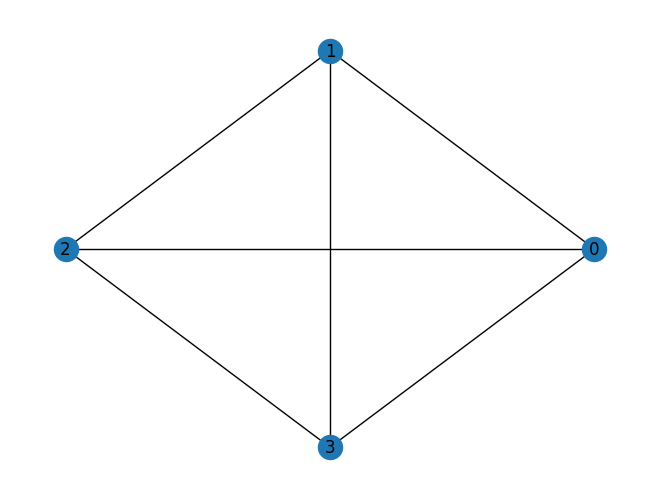

In [11]:
graph_details(nx.tetrahedral_graph())

# Octa-Hedron

Platonic Octahedral Graph Node Number:  6
Platonic Octahedral Graph Edge Number:  12
Platonic Octahedral Graph Is Optimally Connected:  False
Platonic Octahedral Graph Is Node Simmilar:  True
Platonic Octahedral Graph Is Symmetry:  True


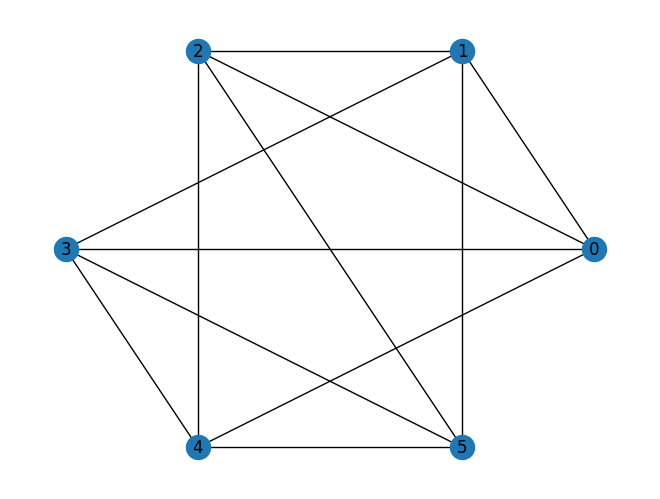

In [12]:
graph_details(nx.octahedral_graph())

# cubical

('Platonic Cubical Graph',) Node Number:  8
('Platonic Cubical Graph',) Edge Number:  12
('Platonic Cubical Graph',) Is Optimally Connected:  False
('Platonic Cubical Graph',) Is Node Simmilar:  True
('Platonic Cubical Graph',) Is Symmetry:  True


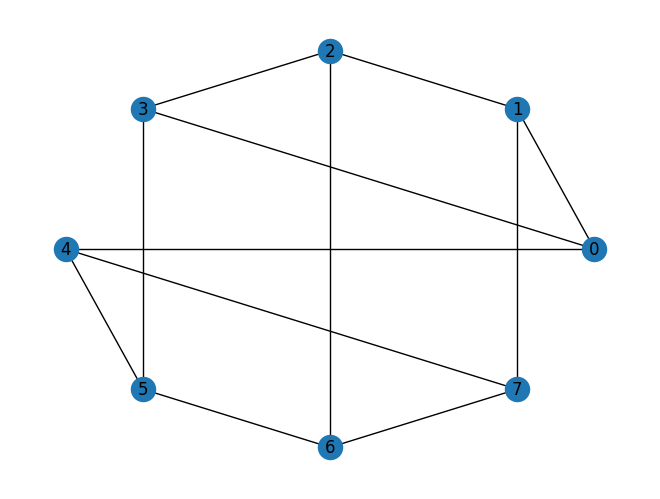

In [13]:
graph_details(nx.cubical_graph())

# Icosa-Hedron

Platonic Icosahedral Graph Node Number:  12
Platonic Icosahedral Graph Edge Number:  30
Platonic Icosahedral Graph Is Optimally Connected:  False
Platonic Icosahedral Graph Is Node Simmilar:  True
Platonic Icosahedral Graph Is Symmetry:  True


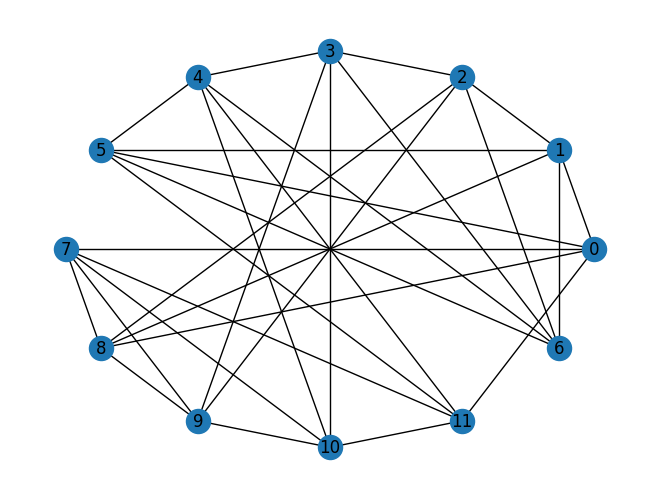

In [14]:
# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.icosahedral_graph())

graph_details_manual_permutation(nx.icosahedral_graph())

# Soccer-Ball

KeyboardInterrupt: 

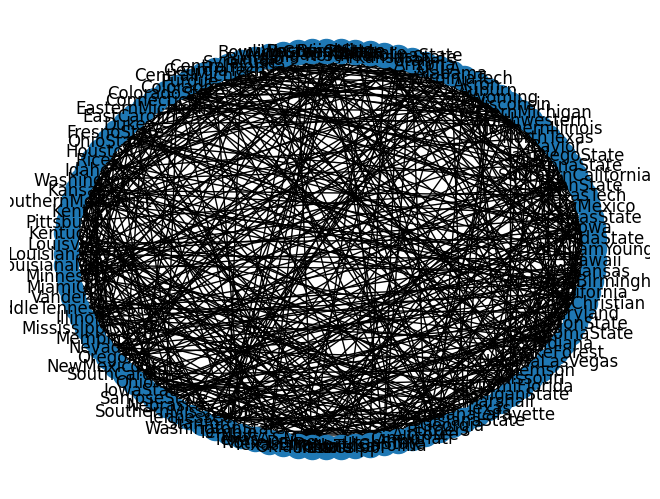

In [16]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
soccer_ball = nx.parse_gml(gml)  # parse gml data




# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(soccer_ball)

graph_details_manual_permutation(soccer_ball)

# Truncated-Tetrahedron

In [ ]:
# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.truncated_tetrahedron_graph())

graph_details_manual_permutation(nx.truncated_tetrahedron_graph())

# Hyper-Cube

In [ ]:
# n is dimension number. nodes number will be: 2 ** n
n = 3

# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.truncated_tetrahedron_graph(n))

graph_details_manual_permutation(nx.truncated_tetrahedron_graph())

# heawood (Torus)

In [ ]:
# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.heawood_graph())

graph_details_manual_permutation(nx.heawood_graph())